In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
sns.set_style('white')
plt.rcParams["figure.figsize"] = (12, 8)

In [2]:
!pip install -U kaleido


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: C:\Users\oludo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
mean_years = pd.read_csv('mean-years-of-schooling-long-run.csv', sep=';')
mean_years

,Entity,Code,Year,avg_years_of_schooling
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01
...,...,...,...,...
7758,Zimbabwe,ZWE,2013,8.00
7759,Zimbabwe,ZWE,2014,8.20
7760,Zimbabwe,ZWE,2015,8.20
7761,Zimbabwe,ZWE,2016,8.20


In [4]:
ad_mort = pd.read_csv('Adult mortality.csv', skiprows=1)
#ad_mort = ad_mort[(ad_mort['Year'] >= 2013) & (ad_mort['Year'] <2017)]
ad_mort

,Country,Year,Both sexes,Male,Female
0,Afghanistan,2016,245,272,216
1,Afghanistan,2015,233,254,210
2,Afghanistan,2014,234,254,213
3,Afghanistan,2013,235,254,215
4,Afghanistan,2012,242,262,221
...,...,...,...,...,...
3106,Zimbabwe,2004,694,725,670
3107,Zimbabwe,2003,697,728,671
3108,Zimbabwe,2002,695,728,667
3109,Zimbabwe,2001,688,723,656


In [5]:
mat_mort = pd.read_csv('Maternal mortality.csv')
mat_mort

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
0,Afghanistan,2017,638 [ 427 - 1 010 ],7 700 [ 5 100 - 12 000 ]
1,Afghanistan,2016,673 [ 457 - 1 040 ],8 100 [ 5 500 - 12 000 ]
2,Afghanistan,2015,701 [ 501 - 1 020 ],8 400 [ 6 000 - 12 000 ]
3,Afghanistan,2014,786 [ 592 - 1 080 ],9 300 [ 7 000 - 13 000 ]
4,Afghanistan,2013,810 [ 617 - 1 080 ],9 600 [ 7 300 - 13 000 ]
...,...,...,...,...
3289,Zimbabwe,2004,686 [ 597 - 784 ],2 800 [ 2 400 - 3 100 ]
3290,Zimbabwe,2003,680 [ 590 - 779 ],2 700 [ 2 300 - 3 100 ]
3291,Zimbabwe,2002,666 [ 577 - 766 ],2 600 [ 2 200 - 3 000 ]
3292,Zimbabwe,2001,629 [ 544 - 723 ],2 400 [ 2 100 - 2 800 ]


In [6]:
prob_dth = pd.read_csv('Probability of dying per 1000 live births.csv',skiprows=1)
prob_dth.rename(columns={' Both sexes':'inf_both_sexes',
                         ' Male':'inf_male',
                         ' Female':'inf_female',
                         ' Both sexes.1':'neonat_both_sexes',
                         ' Both sexes.2':'u5_both_sexes',
                         ' Male.1':'u5_male',
                         ' Female.1':'u5_female'}, inplace=True)
prob_dth = prob_dth[(prob_dth['Year'] >= 2013) & (prob_dth['Year'] <2017)]
prob_dth

,Country,Year,inf_both_sexes,inf_male,inf_female,neonat_both_sexes,u5_both_sexes,u5_male,u5_female
2,Afghanistan,2016,51.2,54.5,47.7,39.3,67.5,70.9,63.7
3,Afghanistan,2015,53.1,56.5,49.6,40.5,70.4,73.8,66.7
4,Afghanistan,2014,55.1,58.6,51.5,41.9,73.6,77.0,69.9
5,Afghanistan,2013,57.3,60.8,53.6,43.3,76.9,80.5,73.2
8,Albania,2016,8.2,8.9,7.6,6.2,9.3,9.9,8.6
...,...,...,...,...,...,...,...,...,...
1157,Zambia,2013,47.8,52.0,43.4,25.3,70.7,75.9,65.1
1160,Zimbabwe,2016,36.3,40.4,32.0,22.3,50.4,55.0,45.5
1161,Zimbabwe,2015,38.5,42.8,34.0,23.1,54.3,59.2,49.2
1162,Zimbabwe,2014,40.4,44.9,35.6,24.2,57.5,62.5,52.3


In [7]:
num_dth = pd.read_csv('Number of deaths (thousands).csv')
num_dth

,Unnamed: 0,Unnamed: 1,Number of under-five deaths (thousands),Number of under-five deaths (thousands).1,Number of under-five deaths (thousands).2,Number of infant deaths (thousands),Number of infant deaths (thousands).1,Number of infant deaths (thousands).2,Number of neonatal deaths (thousands)
0,Country,Year,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes
1,Afghanistan,2018,74278,40312,33966,57182,31394,25788,44725
2,Afghanistan,2017,76877,41631,35246,58846,32244,26602,45771
3,Afghanistan,2016,79770,43134,36636,60673,33222,27451,46963
4,Afghanistan,2015,82918,44733,38185,62652,34257,28395,48237
...,...,...,...,...,...,...,...,...,...
1160,Zimbabwe,2017,22519,12419,10100,16015,9010,7005,9696
1161,Zimbabwe,2016,23326,12867,10459,16693,9396,7297,10235
1162,Zimbabwe,2015,25433,14001,11432,18006,10121,7885,10815
1163,Zimbabwe,2014,27058,14866,12192,19051,10707,8344,11447


In [8]:
mean_years.rename(columns={'Entity':'Country'},inplace=True)

In [9]:
mean_years = mean_years[(mean_years['Year'] >= 2000) & (mean_years['Year'] < 2017)]
mean_years

,Country,Code,Year,avg_years_of_schooling
34,Afghanistan,AFG,2000,2.2
35,Afghanistan,AFG,2001,2.2
36,Afghanistan,AFG,2002,2.3
37,Afghanistan,AFG,2003,2.4
38,Afghanistan,AFG,2004,2.5
...,...,...,...,...
7757,Zimbabwe,ZWE,2012,7.9
7758,Zimbabwe,ZWE,2013,8.0
7759,Zimbabwe,ZWE,2014,8.2
7760,Zimbabwe,ZWE,2015,8.2


In [10]:
merge_df = pd.merge(mean_years,ad_mort, on=['Country','Year'])
#merge_df = pd.merge(merge_df,prob_dth, on=['Country','Year'])
merge_df

,Country,Code,Year,avg_years_of_schooling,Both sexes,Male,Female
0,Afghanistan,AFG,2000,2.2,316,340,290
1,Afghanistan,AFG,2001,2.2,307,330,283
2,Afghanistan,AFG,2002,2.3,292,309,275
3,Afghanistan,AFG,2003,2.4,286,304,268
4,Afghanistan,AFG,2004,2.5,282,300,263
...,...,...,...,...,...,...,...
2691,Zimbabwe,ZWE,2012,7.9,407,464,357
2692,Zimbabwe,ZWE,2013,8.0,383,437,336
2693,Zimbabwe,ZWE,2014,8.2,358,395,328
2694,Zimbabwe,ZWE,2015,8.2,346,383,314


In [11]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [12]:
merge_df['Continent'] = merge_df['Country'].apply(lambda row: country_to_continent(row))

In [13]:
final_df = merge_df.sort_values(['Country','Year'], ascending=[True,False]).reset_index()
final_df.drop(columns='index', inplace=True)
final_df

,Country,Code,Year,avg_years_of_schooling,Both sexes,Male,Female,Continent
0,Afghanistan,AFG,2016,3.6,245,272,216,Asia
1,Afghanistan,AFG,2015,3.6,233,254,210,Asia
2,Afghanistan,AFG,2014,3.5,234,254,213,Asia
3,Afghanistan,AFG,2013,3.5,235,254,215,Asia
4,Afghanistan,AFG,2012,3.4,242,262,221,Asia
...,...,...,...,...,...,...,...,...
2691,Zimbabwe,ZWE,2004,6.8,694,725,670,Africa
2692,Zimbabwe,ZWE,2003,6.8,697,728,671,Africa
2693,Zimbabwe,ZWE,2002,6.9,695,728,667,Africa
2694,Zimbabwe,ZWE,2001,6.7,688,723,656,Africa


In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696 entries, 0 to 2695
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2696 non-null   object 
 1   Code                    2696 non-null   object 
 2   Year                    2696 non-null   int64  
 3   avg_years_of_schooling  2696 non-null   float64
 4   Both sexes              2696 non-null   int64  
 5   Male                    2696 non-null   int64  
 6   Female                  2696 non-null   int64  
 7   Continent               2696 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 168.6+ KB


In [15]:
merge_df

,Country,Code,Year,avg_years_of_schooling,Both sexes,Male,Female,Continent
0,Afghanistan,AFG,2000,2.2,316,340,290,Asia
1,Afghanistan,AFG,2001,2.2,307,330,283,Asia
2,Afghanistan,AFG,2002,2.3,292,309,275,Asia
3,Afghanistan,AFG,2003,2.4,286,304,268,Asia
4,Afghanistan,AFG,2004,2.5,282,300,263,Asia
...,...,...,...,...,...,...,...,...
2691,Zimbabwe,ZWE,2012,7.9,407,464,357,Africa
2692,Zimbabwe,ZWE,2013,8.0,383,437,336,Africa
2693,Zimbabwe,ZWE,2014,8.2,358,395,328,Africa
2694,Zimbabwe,ZWE,2015,8.2,346,383,314,Africa


In [16]:
import plotly.express as px

px.line(merge_df.groupby(['Year','Continent'], as_index=False)['Both sexes','avg_years_of_schooling'].mean(), y='Both sexes',x='Year',template='simple_white',
        color='Continent')


C:\Users\oludo\AppData\Local\Temp\ipykernel_13528\4244053519.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  px.line(merge_df.groupby(['Year','Continent'], as_index=False)['Both sexes','avg_years_of_schooling'].mean(), y='Both sexes',x='Year',template='simple_white',


In [17]:
merge_df.groupby(['Year','Continent'], as_index=False)['Both sexes','avg_years_of_schooling'].mean()

C:\Users\oludo\AppData\Local\Temp\ipykernel_13528\2552727673.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Year,Continent,Both sexes,avg_years_of_schooling
0,2000,Africa,358.386364,4.031818
1,2000,Asia,167.472222,7.166667
2,2000,Europe,126.764706,9.879412
3,2000,North America,175.315789,7.389474
4,2000,Oceania,181.625000,8.212500
...,...,...,...,...
97,2016,Asia,131.025641,8.715385
98,2016,Europe,89.000000,11.802857
99,2016,North America,142.000000,9.000000
100,2016,Oceania,139.111111,9.155556


In [18]:
final_df.to_csv('Complete_mortality_y_of_schooling.csv', index=False)

In [19]:
sui_rate = pd.read_csv('suicide.csv')
sui_rate.columns
sui_rate_f = sui_rate.groupby(['country','year'], as_index=False)[['suicides/100k pop',' gdp_for_year ($) ']].sum()

C:\Users\oludo\AppData\Local\Temp\ipykernel_13528\3978011245.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [20]:
gdp = sui_rate.groupby(['country','year'], as_index=False)['gdp_per_capita ($)'].min()
sui_rate_f['gdp'] = gdp['gdp_per_capita ($)']
sui_rate_f

,country,year,suicides/100k pop,gdp
0,Albania,1987,31.85,796
1,Albania,1988,32.46,769
2,Albania,1989,33.40,833
3,Albania,1992,18.00,251
4,Albania,1993,32.56,437
...,...,...,...,...
2316,Uzbekistan,2010,63.23,1533
2317,Uzbekistan,2011,67.14,1767
2318,Uzbekistan,2012,77.53,1964
2319,Uzbekistan,2013,78.86,2150


In [21]:
sui_rate_f.rename(columns={'country':'Country','year':'Year','suicides/100k pop':'suicides_per_100k'}, inplace=True)
sui_rate_f

,Country,Year,suicides_per_100k,gdp
0,Albania,1987,31.85,796
1,Albania,1988,32.46,769
2,Albania,1989,33.40,833
3,Albania,1992,18.00,251
4,Albania,1993,32.56,437
...,...,...,...,...
2316,Uzbekistan,2010,63.23,1533
2317,Uzbekistan,2011,67.14,1767
2318,Uzbekistan,2012,77.53,1964
2319,Uzbekistan,2013,78.86,2150


In [22]:
final_df_2 = pd.merge(final_df,sui_rate_f)
final_df_2['Year'] = pd.to_numeric(final_df_2['Year'])

In [23]:
#final_df_2.sort_values(['Country','Year'], ascending=[True,True], inplace=True, ignore_index=True)
final_df_2.sort_values('Year',inplace=True)


In [24]:
final_df_2.to_csv('final_df_2.csv', index=False)

In [25]:
final_df_2.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [26]:
import plotly.express as px
px.scatter(final_df_2, x='avg_years_of_schooling', y='Both sexes',
           size='Both sexes', size_max=30, color='Continent', animation_frame='Year', animation_group="Country",
           template='simple_white', width=1000, height=700,hover_name='Country')


In [38]:
import plotly.express as px
px.scatter(final_df_2, x='avg_years_of_schooling', y='suicides_per_100k',
           size='suicides_per_100k', size_max=30, color='Continent', animation_frame="Year", animation_group="Country",
           template='simple_white', width=1000, height=700,hover_name='Country')

In [28]:
final_df_2['gdp'] = [x.replace(',','') for x in final_df_2['gdp']]
final_df_2


AttributeError: 'int' object has no attribute 'replace'

In [29]:
top_gdp = final_df_2.groupby('Year').apply(lambda x : x.sort_values(by = 'gdp', ascending = False).head(5).reset_index(drop = True))
top_gdp

Country Code  Year  avg_years_of_schooling  Both sexes  Male  \
Year                                                                       
2000 0   Luxembourg  LUX  2000                    10.3          90   113   
     1       Norway  NOR  2000                    12.0          84   106   
     2        Japan  JPN  2000                    10.7          72    96   
     3  Switzerland  CHE  2000                    11.4          78   100   
     4      Iceland  ISL  2000                     9.4          76    95   
...             ...  ...   ...                     ...         ...   ...   
2016 0      Iceland  ISL  2016                    12.4          55    67   
     1        Qatar  QAT  2016                     9.8          62    66   
     2       Sweden  SWE  2016                    12.4          52    64   
     3  Netherlands  NLD  2016                    12.1          59    66   
     4      Austria  AUT  2016                    12.1          62    80   

        Female Continent  suicides_per_100k    gdp  
Year                                                
2000 0      65    Europe             222.64  51841  
     1      61    Europe             150.33  41099  
     2      47      Asia             278.52  40813  
     3      54    Europe             266.20  39952  
     4      57    Europe             207.99  34372  
...        ...       ...                ...    ...  
2016 0      42    Europe             138.07  64708  
     1      47      Asia              16.43  62484  
     2      40    Europe             138.84  55594  
     3      52    Europe             127.39  48108  
     4      44    Europe             183.23  46976  

[85 rows x 10 columns]

In [30]:
final_df_2.columns

Index(['Country', 'Code', 'Year', 'avg_years_of_schooling', 'Both sexes',
       'Male', 'Female', 'Continent', 'suicides_per_100k', 'gdp'],
      dtype='object')

In [47]:
import plotly.io as pi
fig = px.bar(final_df_2[final_df_2['Year'] == 2015].sort_values('gdp',ascending=False).head(30),x='Country', y='gdp',
        color='Continent',template='simple_white', width=1000, height=700, text='gdp', title='Top 30 Countries for GDP per capita ($)',
        labels={'gdp':'GDP Per Capita ($)'})
fig.update_layout(title_text='Top 30 Countries for GDP per capita ($)', title_x=0.5)
fig

<AxesSubplot: >

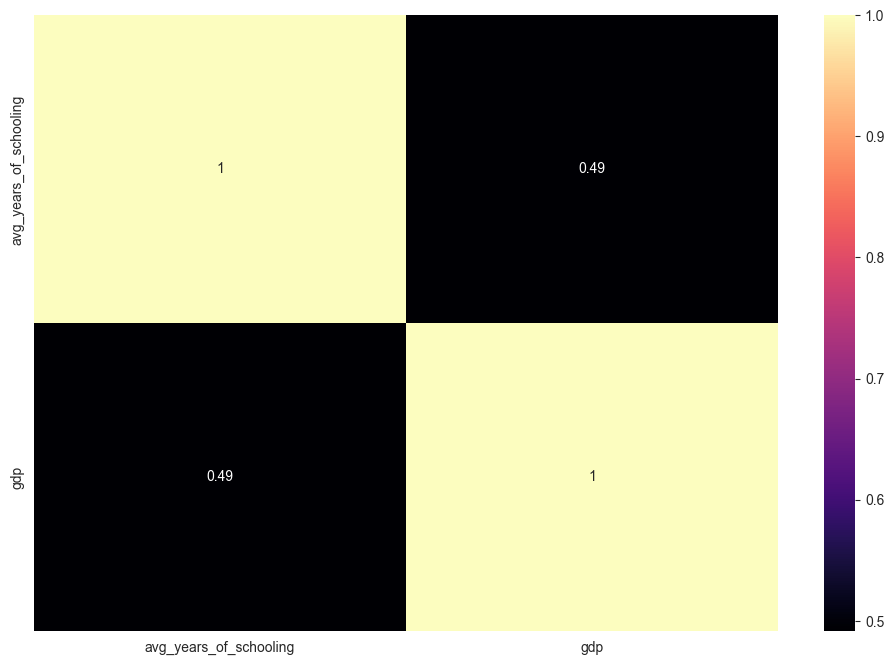

In [54]:
sns.heatmap(final_df_2[final_df_2['Year'] == 2015].sort_values('gdp',ascending=False)[['avg_years_of_schooling','gdp']].corr(), cmap='magma', annot=True)

In [32]:
happiness = pd.read_csv('2015.csv')
happiness = happiness[['Country','Happiness Score']]
happiness['Year'] = 2015
happiness

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Canada,7.427,2015
...,...,...,...
153,Rwanda,3.465,2015
154,Benin,3.340,2015
155,Syria,3.006,2015
156,Burundi,2.905,2015


In [33]:
final_2015 = final_df_2[final_df_2['Year'] == 2015]
happiness_final = pd.merge(final_2015,happiness)
happiness_final

,Country,Code,Year,avg_years_of_schooling,Both sexes,Male,Female,Continent,suicides_per_100k,gdp,Happiness Score
0,Nicaragua,NIC,2015,6.5,148,193,105,North America,69.87,2303,5.828
1,Uruguay,URY,2015,8.7,114,149,80,South America,270.02,16696,6.485
2,Ukraine,UKR,2015,11.3,188,276,102,Europe,244.72,2256,4.681
3,Turkmenistan,TKM,2015,9.8,198,262,136,Asia,28.48,7326,5.548
4,Estonia,EST,2015,12.7,116,169,63,Europe,205.38,18149,5.429
5,Finland,FIN,2015,12.4,70,94,44,Europe,161.19,44862,7.406
6,Ecuador,ECU,2015,8.4,117,146,88,South America,97.39,6832,5.975
7,Netherlands,NLD,2015,12.1,58,66,50,Europe,126.93,47206,7.378
8,Spain,ESP,2015,9.7,58,77,39,Europe,97.38,27108,6.329
9,Denmark,DNK,2015,12.5,66,81,51,Europe,121.42,55972,7.527


In [34]:
avg_sui = final_df_2.groupby('Year', as_index=False)['suicides_per_100k'].mean()
avg_sui

,Year,suicides_per_100k
0,2000,167.957027
1,2001,163.123158
2,2002,162.434800
3,2003,154.342500
4,2004,143.825600
5,2005,140.559054
6,2006,137.960789
7,2007,139.966883
8,2008,139.623816
9,2009,133.387125


In [35]:
import plotly.graph_objects as go
countries = ['Japan','Iceland','Sweden','Luxembourg','Norway']
fig = px.line(final_df_2[final_df_2['Country'].isin(countries)], x='Year', y='suicides_per_100k', color='Country')

fig.add_trace(go.Scatter(x=avg_sui['Year'],y=avg_sui['suicides_per_100k'],mode="lines",line=go.scatter.Line(color="gray"),showlegend=False))

In [36]:
data = {
   'year':[2015,2016,2017,2018,2019],
   'lifeexp':[75,74,72,70,69],
   'state':['kerala','punjab','karnataka','andhra','odisha'],
   'ratio':[74,73.9,71.5,69.8,69]
}

# Create dataframe
df = pd.DataFrame(data)

# Create Line plot
fig = px.line(df, x=df['year'], y=df['lifeexp'])

# Add Scatter plot
fig.add_scatter(x=df['year'], y=df['ratio'])

# Display the plot
fig.show()

In [37]:
final_df_2

,Country,Code,Year,avg_years_of_schooling,Both sexes,Male,Female,Continent,suicides_per_100k,gdp
1203,Uzbekistan,UZB,2000,9.1,183,230,135,Asia,120.31,632
197,Brazil,BRA,2000,5.6,184,244,122,South America,68.23,4156
729,Maldives,MDV,2000,3.0,142,155,129,Asia,0.00,2524
745,Malta,MLT,2000,8.1,70,88,51,Europe,78.05,11873
762,Mauritius,MUS,2000,6.2,172,221,121,Africa,140.82,4339
...,...,...,...,...,...,...,...,...,...,...
1082,Sweden,SWE,2016,12.4,52,64,40,Europe,138.84,55594
71,Austria,AUT,2016,12.1,62,80,44,Europe,183.23,46976
532,Iceland,ISL,2016,12.4,55,67,42,Europe,138.07,64708
307,Cyprus,CYP,2016,12.1,55,73,37,Asia,47.15,25098


In [39]:
px.scatter(final_df_2, x='gdp', y='suicides_per_100k',
           size='suicides_per_100k', size_max=30, color='Continent', animation_frame="Year", animation_group="Country",
           template='simple_white', width=1000, height=700,hover_name='Country')

In [46]:
fig = px.bar(final_df_2[final_df_2['Year'] == 2015].sort_values('avg_years_of_schooling',ascending=False).head(30),x='Country', y='avg_years_of_schooling',
        color='Continent',template='simple_white', width=1000, height=700, text='avg_years_of_schooling', title='Top 30 Countries for Average Education',
        labels={'avg_years_of_schooling':'Average number of years spent studying'})
fig.update_layout(title_text='Top 30 Countries for Average Education', title_x=0.5)
fig

In [63]:
fig = px.scatter(final_df_2[final_df_2['Year']==2015], x='gdp', y='avg_years_of_schooling',
           size='gdp', size_max=30, color='Continent', title='Comparing relationships between Education and Wealth',
           labels={'gdp':'GDP per capita ($)','avg_years_of_schooling':'Average number of years spent studying'},
           template='simple_white', width=1000, height=700,hover_name='Country')
fig.update_layout(title_text='Comparing relationships between Education and Wealth', title_x=0.5)
fig